In [50]:
import numpy as np
import pandas as pd

# next command ensures that plots appear inside the notebook
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns  # also improves the look of plots
sns.set()  # set Seaborn defaults
plt.rcParams['figure.figsize'] = [15, 15]  # default hor./vert. size of plots, in inches
plt.rcParams['lines.markeredgewidth'] = 1  # to fix issue with seaborn box plots; needed after import seaborn

In [51]:
df = pd.read_csv('../cosine_similarity.csv')

# remove rows that contains values that are larger than 2 or smaller than 2
outliers = df[(df['cos_sim_uint32'] > 2) | (df['cos_sim_uint32'] < 0)]
df = df[(df['cos_sim'] > 0) & (df['cos_sim'] < 1.1)]
df = df[(df['cos_sim_uint64'] > 0) & (df['cos_sim_uint64'] < 1.1)]
df = df[(df['cos_sim_uint32'] > 0) & (df['cos_sim_uint32'] < 1.1)]
df = df[(df['cos_sim_uint16'] > 0) & (df['cos_sim_uint16'] < 1.1)]
df = df[(df['cos_sim_uint8'] > 0) & (df['cos_sim_uint8'] < 1.1)]

df.head()

,Unnamed: 0,cos_sim,cos_sim_uint64,cos_sim_uint32,cos_sim_uint16,cos_sim_uint8
0,0,0.457468,0.461441,0.461441,0.5016,0.131818
1,1,0.882698,0.884127,0.884127,0.9005,0.268182
2,2,0.319045,0.325226,0.325226,0.3859,0.027273
4,4,0.355503,0.361459,0.361459,0.4066,0.650000
5,5,0.375553,0.381814,0.381814,0.4343,0.081818


Average difference between cos_sim and cos_sim_uint8:  -0.033743111251409844


Text(0.5, 1.0, 'cos_dist_np vs cos_dist_sfe')

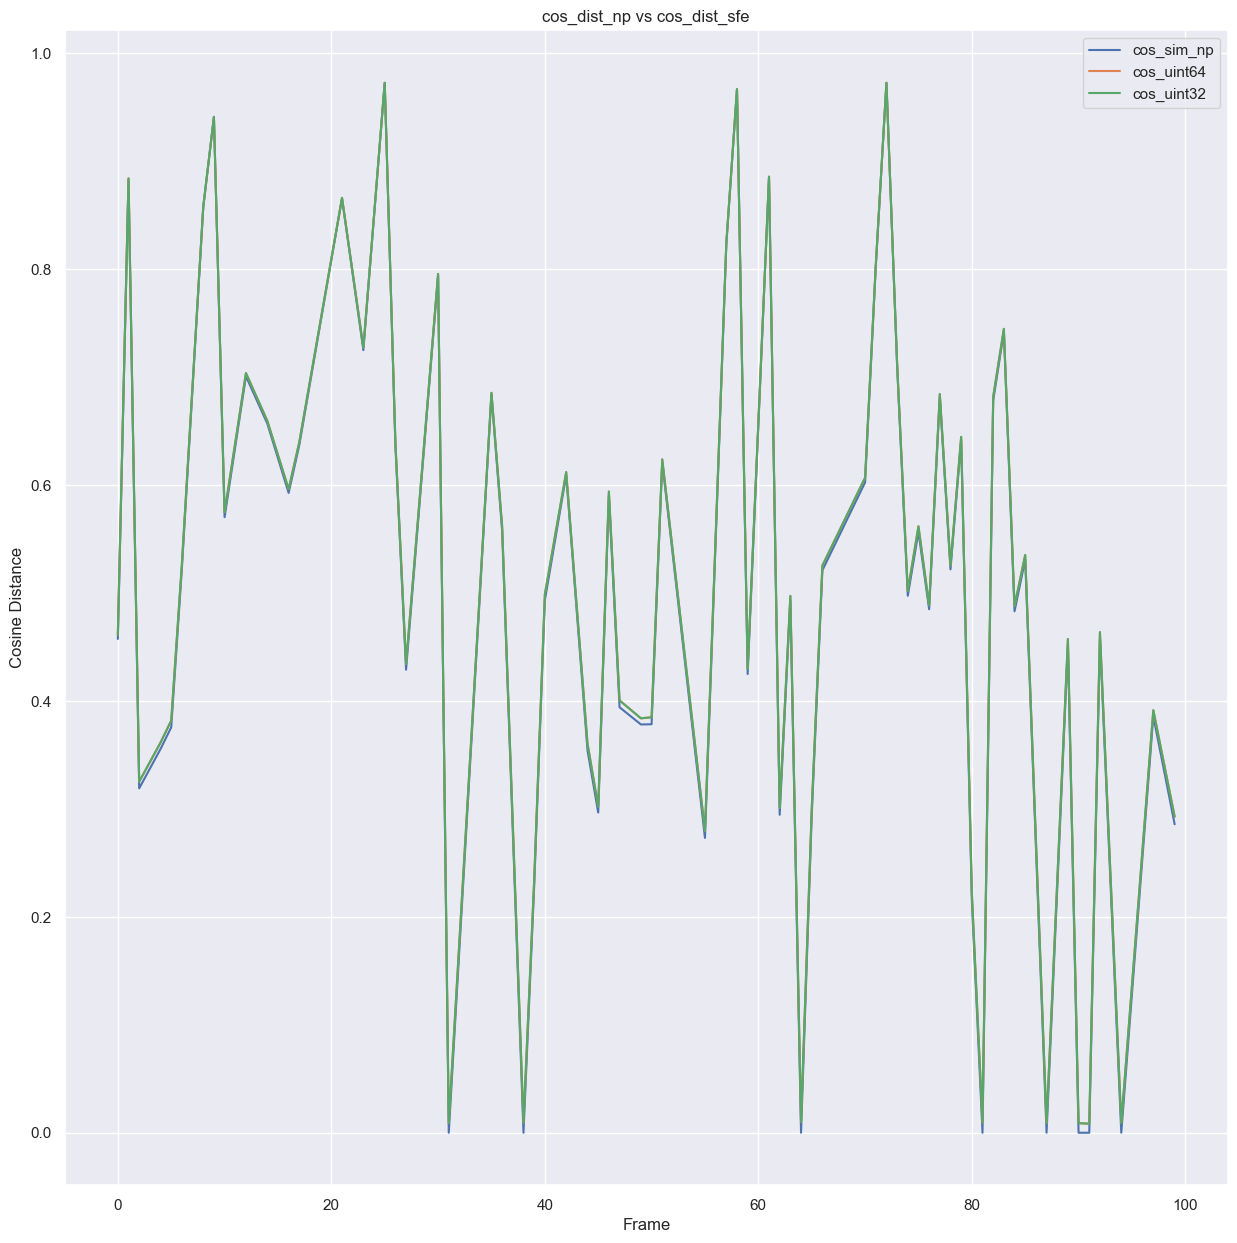

In [52]:
# output the average differnce between cos_sim and cos_sim_uint8
diff = df["cos_sim_uint8"] - df["cos_sim"]
print("Average difference between cos_sim and cos_sim_uint8: ", diff.mean())

plt.plot(df["cos_sim"], label="cos_sim_np")
plt.plot(df["cos_sim_uint64"], label="cos_uint64")
plt.plot(df["cos_sim_uint32"], label="cos_uint32")
#plt.plot(df["cos_sim_uint16"], label="cos_uint16")
#plt.plot(df["cos_sim_uint8"], label="cos_uint8")
plt.xlabel("Frame")
plt.ylabel("Cosine Distance")
plt.legend()
plt.title("cos_dist_np vs cos_dist_sfe")

# plot diff as bars to see the difference between cos_sim and cos_sim_uint8
# plt.figure()
# plt.bar(df.index, diff)
# plt.xlabel("Frame")
# plt.ylabel("Difference")
# plt.title("Difference between cos_sim and cos_sim_uint8")
# plt.show()